# Coca-Cola Income Statement Analysis (2013- 2023)

In [1]:
# Import necessary libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import io

In [2]:
# Defines the base URL for Coca-Cola's financial reports
url = "https://investors.coca-colacompany.com/financial-information/financial-results"

# Defines the years and their corresponding div IDs
years = {
    "2014": "2014-6005-results",
    "2015": "2015-6009-results",
    "2017": "2017-6017-results",
    "2019": "2019-6025-results",
    "2020": "2020-7500-results",
    "2021": "2021-7703-results",
    "2023": "2023-7987-results"
}

# Fetches the content of the page
response = requests.get(url)
if response.status_code == 200:
    print("Successfully fetched the page")
else:
    print(f"Failed to fetch the page with status code: {response.status_code}")
    response.raise_for_status()

# Parses the page content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Initializes a dictionary to store the dataframes
df = {}

# Loops through each year and its corresponding section ID
for year, section_id in years.items():
    print(f"Processing year: {year}")
    
    # Finds the specific financial report section
    section = soup.find('div', attrs={'id': section_id})
    
    # Checks if the section was found
    if section:
        # Finds the anchor tag with the title 'XBRL Spreadsheet'
        a_tag = section.find('a', attrs={'title': "XBRL Spreadsheet"})
        
        # Checks if the anchor tag was found
        if a_tag and 'href' in a_tag.attrs:
            # Extracts the href attribute (the URL to the XBRL Spreadsheet)
            xbrl_url = a_tag['href']
            print(f"XBRL Spreadsheet URL for {year}: {xbrl_url}")
        else:
            print(f"XBRL Spreadsheet link not found for {year}")
    else:
        print(f"Financial report section not found for {year}")

Successfully fetched the page
Processing year: 2014
XBRL Spreadsheet URL for 2014: https://s3.amazonaws.com/content.stockpr.com/sec/0000021344-15-000005/Financial_Report.xlsx
Processing year: 2015
XBRL Spreadsheet URL for 2015: https://s3.amazonaws.com/content.stockpr.com/sec/0000021344-16-000050/Financial_Report.xlsx
Processing year: 2017
XBRL Spreadsheet URL for 2017: https://s3.amazonaws.com/content.stockpr.com/sec/0000021344-18-000008/Financial_Report.xlsx
Processing year: 2019
XBRL Spreadsheet URL for 2019: https://s3.amazonaws.com/content.stockpr.com/sec/0000021344-20-000006/Financial_Report.xlsx
Processing year: 2020
XBRL Spreadsheet URL for 2020: https://s3.amazonaws.com/content.stockpr.com/sec/0000021344-21-000008/Financial_Report.xlsx
Processing year: 2021
XBRL Spreadsheet URL for 2021: https://s3.amazonaws.com/content.stockpr.com/sec/0000021344-22-000009/Financial_Report.xlsx
Processing year: 2023
XBRL Spreadsheet URL for 2023: https://content.equisolve.net/sec/0000021344-24

## Get the Income statement and Share Info

In [3]:
# Function to load data from multiple sheets with custom names and custom headers
def load_financial_data_multiple_sheets(url, sheet_mapping, header):
    try:
        dfs = {}
        for custom_name, sheet in sheet_mapping.items():
            dfs[custom_name] = pd.read_excel(io=url, sheet_name=sheet, header=header)
        return dfs
    except Exception as e:
        print(f"Error loading data from {url}: {e}")
        return None

In [4]:
# URLs and parameters for each year
urls = {
    "2014": {
        "url": 'https://s3.amazonaws.com/content.stockpr.com/sec/0000021344-15-000005/Financial_Report.xlsx',
        "sheet_mapping": {
            "income statement": 1,
            "share info": 7
        },
        "header": 1
    },
    "2017": {
        "url": 'https://s3.amazonaws.com/content.stockpr.com/sec/0000021344-18-000008/Financial_Report.xlsx',
        "sheet_mapping": {
            "income statement": 1,
            "share info": 8
        },
        "header": 1
    },
    "2020": {
        "url": 'https://s3.amazonaws.com/content.stockpr.com/sec/0000021344-21-000008/Financial_Report.xlsx',
        "sheet_mapping": {
            "income statement": 1,
            "share info": 7
        },
        "header": 1
    },
    "2023": {
        "url": 'https://content.equisolve.net/sec/0000021344-24-000009/Financial_Report.xlsx',
        "sheet_mapping": {
            "income statement": 2,
            "share info": 8
        },
        "header": 1
    }
}

In [5]:
# Initialize a dictionary to store the dataframes
dataframes = {}

# Loop through the URLs and load the data from multiple sheets with headers
for year, params in urls.items():
    dfs = load_financial_data_multiple_sheets(params["url"], params["sheet_mapping"], params["header"])
    if dfs is not None:
        dataframes[year] = dfs
        print(f"Loading data for year {year}... successfully")
    else:
        print(f"Failed to load data for {year}")

Loading data for year 2014... successfully
Loading data for year 2017... successfully
Loading data for year 2020... successfully
Loading data for year 2023... successfully


## Data Cleaning

### Data Cleaning for Income Statement Dataframe

In [6]:
# lets see the headers of each year
print("2014 Income Statement:")
print(dataframes['2014']["income statement"].head(3))

print("2017 Income Statement:")
print(dataframes['2017']["income statement"].head(3))

print("2020 Income Statement:")
print(dataframes['2020']["income statement"].head(3))

print("2023 Income Statement:")
print(dataframes['2023']["income statement"].head(3))

2014 Income Statement:
  In Millions, except Per Share data, unless otherwise specified  \
0                             NET OPERATING REVENUES               
1                                 Cost of goods sold               
2                                       GROSS PROFIT               

  Dec. 31, 2014 Unnamed: 2  Dec. 31, 2013 Unnamed: 4  Dec. 31, 2012 Unnamed: 6  
0         45998        NaN        46854.0        NaN        48017.0        NaN  
1         17889        NaN        18421.0        NaN        19053.0        NaN  
2         28109        NaN        28433.0        NaN        28964.0        NaN  
2017 Income Statement:
               Unnamed: 0  Dec. 31, 2017  Dec. 31, 2016  Dec. 31, 2015
0  NET OPERATING REVENUES        35410.0        41863.0        44294.0
1      Cost of goods sold        13256.0        16465.0        17482.0
2            GROSS PROFIT        22154.0        25398.0        26812.0
2020 Income Statement:
                        Unnamed: 0  Dec. 31, 2020 

In [7]:
# Renaming of the 'Income statement' dataframes
dataframes['2014']["income statement"].drop(["Unnamed: 2", "Unnamed: 4", "Unnamed: 6","Dec. 31, 2012"], axis=1, inplace=True)
dataframes['2014']["income statement"].rename(columns={"In Millions, except Per Share data, unless otherwise specified":"description",
                                                       }, inplace=True)

dataframes['2017']["income statement"].rename(columns={"Unnamed: 0":"description"}, inplace=True)

dataframes['2020']["income statement"].rename(columns={"Unnamed: 0":"description"}, inplace=True)

dataframes['2023']["income statement"].rename(columns={"Unnamed: 0":"description"}, inplace=True)


# Print the first 3 rows to verify the changes
print(dataframes['2014']["income statement"].head(3))
print(dataframes['2017']["income statement"].head(3))
print(dataframes['2020']["income statement"].head(3))
print(dataframes['2023']["income statement"].head(3))

              description Dec. 31, 2014  Dec. 31, 2013
0  NET OPERATING REVENUES         45998        46854.0
1      Cost of goods sold         17889        18421.0
2            GROSS PROFIT         28109        28433.0
              description  Dec. 31, 2017  Dec. 31, 2016  Dec. 31, 2015
0  NET OPERATING REVENUES        35410.0        41863.0        44294.0
1      Cost of goods sold        13256.0        16465.0        17482.0
2            GROSS PROFIT        22154.0        25398.0        26812.0
                       description  Dec. 31, 2020  Dec. 31, 2019  \
0                         Revenues        33014.0        37266.0   
1  Cost of Goods and Services Sold        13433.0        14619.0   
2                     GROSS PROFIT        19581.0        22647.0   

   Dec. 31, 2018  
0        34300.0  
1        13067.0  
2        21233.0  
              description  Dec. 31, 2023  Dec. 31, 2022  Dec. 31, 2021
0  Net Operating Revenues        45754.0        43004.0        38655.0
1    

### Data Cleaning for Share Info Dataframe

In [8]:
# lets see the headers of each year
print("2014 Share Information:")
print(dataframes['2014']["share info"].head(3))

print("2017 Share Information:")
print(dataframes['2017']["share info"].head(3))

print("2020 Share Information:")
print(dataframes['2020']["share info"].head(3))

print("2023 Share Information:")
print(dataframes['2023']["share info"].head(3))

2014 Share Information:
            Unnamed: 0  Dec. 31, 2014  Dec. 31, 2013  Dec. 31, 2012
0  Dividends per share           1.22           1.12           1.02
2017 Share Information:
                                      Unnamed: 0  Dec. 31, 2017  \
0   Shareowners' Equity Parenthetical [Abstract]            NaN   
1  Common Stock, Dividends, Per Share, Cash Paid           1.48   

   Dec. 31, 2016  Dec. 31, 2015  
0            NaN            NaN  
1            1.4           1.32  
2020 Share Information:
                                      Unnamed: 0  Dec. 31, 2020  \
0   Shareowners' Equity Parenthetical [Abstract]            NaN   
1  Common Stock, Dividends, Per Share, Cash Paid           1.64   

   Dec. 31, 2019  Dec. 31, 2018  
0            NaN            NaN  
1            1.6           1.56  
2023 Share Information:
                                      Unnamed: 0 Dec. 31, 2023 Dec. 31, 2022  \
0   Statement of Stockholders' Equity [Abstract]                               


In [9]:
# Renaming of the 'Share info' dataframes
dataframes['2014']["share info"].drop(["Dec. 31, 2012"], axis=1, inplace=True)
dataframes['2014']["share info"].rename(columns={"Unnamed: 0":"description"}, inplace=True)

dataframes['2017']["share info"].drop([0], inplace=True)
dataframes['2017']["share info"].rename(columns={"Unnamed: 0":"description"}, inplace=True)
dataframes['2020']["share info"].drop([0], inplace=True)
dataframes['2020']["share info"].rename(columns={"Unnamed: 0":"description"}, inplace=True)

dataframes['2023']["share info"].drop([0], inplace=True)
dataframes['2023']["share info"].rename(columns={"Unnamed: 0":"description"}, inplace=True)

# displays the dataframes to verify the changes made
print(dataframes['2014']["share info"].head(3))
print(dataframes['2017']["share info"].head(3))
print(dataframes['2020']["share info"].head(3))
print(dataframes['2023']["share info"].head(3))

           description  Dec. 31, 2014  Dec. 31, 2013
0  Dividends per share           1.22           1.12
                                     description  Dec. 31, 2017  \
1  Common Stock, Dividends, Per Share, Cash Paid           1.48   

   Dec. 31, 2016  Dec. 31, 2015  
1            1.4           1.32  
                                     description  Dec. 31, 2020  \
1  Common Stock, Dividends, Per Share, Cash Paid           1.64   

   Dec. 31, 2019  Dec. 31, 2018  
1            1.6           1.56  
                                     description Dec. 31, 2023 Dec. 31, 2022  \
1  Common Stock, Dividends, Per Share, Cash Paid          1.84          1.76   

  Dec. 31, 2021  
1          1.68  


In [10]:
# Function to convert specified columns to lowercase
def lowercase_columns(df):
    # Assuming 'Description' is the column name you want to convert to lowercase
    if 'description' in df.columns:
        df['description'] = df['description'].str.lower()
    return df

# Apply the lowercase conversion to each dataframe
for year, dfs in dataframes.items():  # Use `dfs` instead of `df` to avoid confusion with inner loop variable
    for custom_name, df in dfs.items():
        # Apply lowercase conversion
        dataframes[year][custom_name] = lowercase_columns(df)

        # Print the modified DataFrame to verify
        print(f"Data from {custom_name} for year {year}:")
        print(dataframes[year][custom_name].head(3))

Data from income statement for year 2014:
              description Dec. 31, 2014  Dec. 31, 2013
0  net operating revenues         45998        46854.0
1      cost of goods sold         17889        18421.0
2            gross profit         28109        28433.0
Data from share info for year 2014:
           description  Dec. 31, 2014  Dec. 31, 2013
0  dividends per share           1.22           1.12
Data from income statement for year 2017:
              description  Dec. 31, 2017  Dec. 31, 2016  Dec. 31, 2015
0  net operating revenues        35410.0        41863.0        44294.0
1      cost of goods sold        13256.0        16465.0        17482.0
2            gross profit        22154.0        25398.0        26812.0
Data from share info for year 2017:
                                     description  Dec. 31, 2017  \
1  common stock, dividends, per share, cash paid           1.48   

   Dec. 31, 2016  Dec. 31, 2015  
1            1.4           1.32  
Data from income statement for 

In [11]:
# Concatenate income_statement and share_info vertically for each year
df_2014 = pd.concat([dataframes['2014']["income statement"], dataframes['2014']["share info"]], ignore_index=True)
df_2017 = pd.concat([dataframes['2017']["income statement"], dataframes['2017']["share info"]], ignore_index=True)
df_2020 = pd.concat([dataframes['2020']["income statement"], dataframes['2020']["share info"]], ignore_index=True)
df_2023 = pd.concat([dataframes['2023']["income statement"], dataframes['2023']["share info"]], ignore_index=True)

# Print the last few rows of each concatenated DataFrame
print("First 3 rows of df_2014:")
print(df_2014.head(3))

print("\nFirst 3 rows of df_2017:")
print(df_2017.head(3))

print("\nFirst 3 rows of df_2020:")
print(df_2020.head(3))

print("\nFirst 3 rows of df_2023:")
print(df_2023.head(3))


First 3 rows of df_2014:
              description Dec. 31, 2014  Dec. 31, 2013
0  net operating revenues         45998        46854.0
1      cost of goods sold         17889        18421.0
2            gross profit         28109        28433.0

First 3 rows of df_2017:
              description  Dec. 31, 2017  Dec. 31, 2016  Dec. 31, 2015
0  net operating revenues        35410.0        41863.0        44294.0
1      cost of goods sold        13256.0        16465.0        17482.0
2            gross profit        22154.0        25398.0        26812.0

First 3 rows of df_2020:
                       description  Dec. 31, 2020  Dec. 31, 2019  \
0                         revenues        33014.0        37266.0   
1  cost of goods and services sold        13433.0        14619.0   
2                     gross profit        19581.0        22647.0   

   Dec. 31, 2018  
0        34300.0  
1        13067.0  
2        21233.0  

First 3 rows of df_2023:
              description Dec. 31, 2023 Dec.

In [12]:
# Define the mapping of terms to a standardized term
description_mapping = {
    "net operating revenues": "revenues",
    "revenues": "revenues",
    "cost of goods sold": "cost of goods sold",
    "cost of goods and services sold": "cost of goods sold",
    "gross profit": "gross profit",
    "selling, general and administrative expenses": "selling, general and administrative expenses",
    "selling, general and administrative expense": "selling, general and administrative expenses",
    "other operating charges": "other operating charges",
    "other cost and expense, operating": "other operating charges",
    "operating income": "operating income",
    "interest income": "interest income",
    "interest expense": "interest expense",
    "equity income (loss) - net": "equity income (loss) - net",
    "equity income (loss)\xa0— net": "equity income (loss) - net",
    "other income (loss) - net": "other income (loss) - net",
    "other income (loss)\xa0— net": "other income (loss) - net",
    "income before income taxes": "income before income taxes",
    "income taxes": "income taxes",
    "consolidated net income": "consolidated net income",
    "less: net income attributable to noncontrolling interests": "net income (loss) attributable to noncontrolling interest",
    "net income (loss) attributable to noncontrolling interest": "net income (loss) attributable to noncontrolling interest",
    "net income attributable to shareowners of the coca-cola company": "net income attributable to shareowners of the coca-cola company",
    "basic net income per share (in dollars per share)": "basic net income per share",
    "basic net income per share1": "basic net income per share",
    "diluted net income per share (in dollars per share)": "diluted net income per share",
    "diluted net income per share1": "diluted net income per share",
    "average shares outstanding (in shares)": "average shares outstanding - basic",
    "average shares outstanding — basic": "average shares outstanding - basic",
    "effect of dilutive securities (in shares)": "effect of dilutive securities",
    "average shares outstanding assuming dilution (in shares)": "average shares outstanding - diluted",
    "average shares outstanding — diluted": "average shares outstanding - diluted",
    "income (loss) from discontinued operations, net of tax, including portion attributable to noncontrolling interest": "income (loss) from discontinued operations, net of tax",
    "income (loss) from continuing operations, per diluted share": "income (loss) from continuing operations,diluted income (loss) from continuing operationsper share",
    "income (loss) from continuing operations, per basic share": "income (loss) from continuing operations, per share",
    "discontinued operation, income (loss) from discontinued operation, net of tax, per basic share": "discontinued operation, income (loss) from discontinued operation, per basic share",
    "discontinued operation, income (loss) from discontinued operation, net of tax, per diluted share": "discontinued operation, income (loss) from discontinued operation, per diluted share",
    "net income from continuing operations": "net income from continuing operations",
    "dividends per share":"earnings per share (EPS)",
    "common stock, dividends, per share, cash paid":"earnings per share (EPS)"
}

In [13]:
# Simplify and standardize the 'description' terms
def description_terms(df):
    if 'description' in df.columns:
        df['description'] = df['description'].map(description_mapping)
    return df

# Apply the simplified terms to each merged dataframe
df_2014 = description_terms(df_2014)
df_2017 = description_terms(df_2017)
df_2020 = description_terms(df_2020)
df_2023 = description_terms(df_2023)

# Display the head of each merged dataframe to verify the changes
print("First 3 rows of df_2014:")
print(df_2014.head(3))

print("\nFirst 3 rows of df_2017:")
print(df_2017.head(3))

print("\nFirst 3 rows of df_2020:")
print(df_2020.head(3))

print("\nFirst 3 rows of df_2023:")
print(df_2023.head(3))

First 3 rows of df_2014:
          description Dec. 31, 2014  Dec. 31, 2013
0            revenues         45998        46854.0
1  cost of goods sold         17889        18421.0
2        gross profit         28109        28433.0

First 3 rows of df_2017:
          description  Dec. 31, 2017  Dec. 31, 2016  Dec. 31, 2015
0            revenues        35410.0        41863.0        44294.0
1  cost of goods sold        13256.0        16465.0        17482.0
2        gross profit        22154.0        25398.0        26812.0

First 3 rows of df_2020:
          description  Dec. 31, 2020  Dec. 31, 2019  Dec. 31, 2018
0            revenues        33014.0        37266.0        34300.0
1  cost of goods sold        13433.0        14619.0        13067.0
2        gross profit        19581.0        22647.0        21233.0

First 3 rows of df_2023:
          description Dec. 31, 2023 Dec. 31, 2022 Dec. 31, 2021
0            revenues       45754.0       43004.0       38655.0
1  cost of goods sold       1

In [14]:
# Merge the DataFrames based on the 'description' column
df = df_2014 .merge(df_2017 , on='description', how='left')
df = df.merge(df_2020, on='description', how='left')
df = df.merge(df_2023, on='description', how='left')

df.head()

,description,"Dec. 31, 2014","Dec. 31, 2013","Dec. 31, 2017","Dec. 31, 2016","Dec. 31, 2015","Dec. 31, 2020","Dec. 31, 2019","Dec. 31, 2018","Dec. 31, 2023","Dec. 31, 2022","Dec. 31, 2021"
0,revenues,45998,46854.0,35410.0,41863.0,44294.0,33014.0,37266.0,34300.0,45754.0,43004.0,38655.0
1,cost of goods sold,17889,18421.0,13256.0,16465.0,17482.0,13433.0,14619.0,13067.0,18520.0,18000.0,15357.0
2,gross profit,28109,28433.0,22154.0,25398.0,26812.0,19581.0,22647.0,21233.0,27234.0,25004.0,23298.0
3,"selling, general and administrative expenses",17218,17310.0,12496.0,15262.0,16427.0,9731.0,12103.0,11002.0,13972.0,12880.0,12144.0
4,other operating charges,1183,895.0,2157.0,1510.0,1657.0,853.0,458.0,1079.0,1951.0,1215.0,846.0


In [15]:
df.shape

(23, 12)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   description    21 non-null     object 
 1   Dec. 31, 2014  22 non-null     object 
 2   Dec. 31, 2013  21 non-null     float64
 3   Dec. 31, 2017  21 non-null     float64
 4   Dec. 31, 2016  21 non-null     float64
 5   Dec. 31, 2015  21 non-null     float64
 6   Dec. 31, 2020  21 non-null     float64
 7   Dec. 31, 2019  21 non-null     float64
 8   Dec. 31, 2018  21 non-null     float64
 9   Dec. 31, 2023  22 non-null     object 
 10  Dec. 31, 2022  22 non-null     object 
 11  Dec. 31, 2021  22 non-null     object 
dtypes: float64(7), object(5)
memory usage: 2.3+ KB


In [19]:
df.head(23)

,description,"Dec. 31, 2014","Dec. 31, 2013","Dec. 31, 2017","Dec. 31, 2016","Dec. 31, 2015","Dec. 31, 2020","Dec. 31, 2019","Dec. 31, 2018","Dec. 31, 2023","Dec. 31, 2022","Dec. 31, 2021"
0,revenues,45998,46854.00,35410.00,41863.00,44294.00,33014.00,37266.00,34300.00,45754.0,43004.0,38655.0
1,cost of goods sold,17889,18421.00,13256.00,16465.00,17482.00,13433.00,14619.00,13067.00,18520.0,18000.0,15357.0
2,gross profit,28109,28433.00,22154.00,25398.00,26812.00,19581.00,22647.00,21233.00,27234.0,25004.0,23298.0
3,"selling, general and administrative expenses",17218,17310.00,12496.00,15262.00,16427.00,9731.00,12103.00,11002.00,13972.0,12880.0,12144.0
4,other operating charges,1183,895.00,2157.00,1510.00,1657.00,853.00,458.00,1079.00,1951.0,1215.0,846.0
5,operating income,9708,10228.00,7501.00,8626.00,8728.00,8997.00,10086.00,9152.00,11311.0,10909.0,10308.0
6,interest income,594,534.00,677.00,642.00,613.00,370.00,563.00,689.00,907.0,449.0,276.0
7,interest expense,483,463.00,841.00,733.00,856.00,1437.00,946.00,950.00,1527.0,882.0,1597.0
8,equity income (loss) - net,769,602.00,1071.00,835.00,489.00,978.00,1049.00,1008.00,1691.0,1472.0,1438.0
9,other income (loss) - net,-1263,576.00,-1666.00,-1234.00,631.00,841.00,34.00,-1674.00,570.0,-262.0,2000.0


In [20]:
# Drop the rows with indices 20 and 21
df.drop([20, 21, 18], inplace=True)

df.tail(3)

,description,"Dec. 31, 2014","Dec. 31, 2013","Dec. 31, 2017","Dec. 31, 2016","Dec. 31, 2015","Dec. 31, 2020","Dec. 31, 2019","Dec. 31, 2018","Dec. 31, 2023","Dec. 31, 2022","Dec. 31, 2021"
17,average shares outstanding - basic,4387,4434.00,4272.00,4317.0,4352.00,4295.00,4276.0,4259.00,4323.0,4328.0,4315.0
19,average shares outstanding - diluted,4450,4509.00,4324.00,4367.0,4405.00,4323.00,4314.0,4299.00,4339.0,4350.0,4340.0
22,earnings per share (EPS),1.22,1.12,1.48,1.4,1.32,1.64,1.6,1.56,1.84,1.76,1.68


In [21]:
 # List of columns to convert from object to float
columns_to_convert = ['Dec. 31, 2014', 'Dec. 31, 2023', 'Dec. 31, 2022', 'Dec. 31, 2021']

# Convert columns to float
df[columns_to_convert] = df[columns_to_convert].astype(float)

# Display the DataFrame after conversion
df.dtypes

description       object
Dec. 31, 2014    float64
Dec. 31, 2013    float64
Dec. 31, 2017    float64
Dec. 31, 2016    float64
Dec. 31, 2015    float64
Dec. 31, 2020    float64
Dec. 31, 2019    float64
Dec. 31, 2018    float64
Dec. 31, 2023    float64
Dec. 31, 2022    float64
Dec. 31, 2021    float64
dtype: object

In [32]:
# Save DataFrame to CSV file
df.to_csv('coca-cola_income_statement.csv', index=False)
df.to_csv(r'C:\Users\hp\Desktop\dataset\coca-cola_income_statement.csv', index=False) 

In [23]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [24]:
df = pd.read_csv('coca-cola_income_statement.csv')
df.head()

,description,"Dec. 31, 2014","Dec. 31, 2013","Dec. 31, 2017","Dec. 31, 2016","Dec. 31, 2015","Dec. 31, 2020","Dec. 31, 2019","Dec. 31, 2018","Dec. 31, 2023","Dec. 31, 2022","Dec. 31, 2021"
0,revenues,45998.0,46854.0,35410.0,41863.0,44294.0,33014.0,37266.0,34300.0,45754.0,43004.0,38655.0
1,cost of goods sold,17889.0,18421.0,13256.0,16465.0,17482.0,13433.0,14619.0,13067.0,18520.0,18000.0,15357.0
2,gross profit,28109.0,28433.0,22154.0,25398.0,26812.0,19581.0,22647.0,21233.0,27234.0,25004.0,23298.0
3,"selling, general and administrative expenses",17218.0,17310.0,12496.0,15262.0,16427.0,9731.0,12103.0,11002.0,13972.0,12880.0,12144.0
4,other operating charges,1183.0,895.0,2157.0,1510.0,1657.0,853.0,458.0,1079.0,1951.0,1215.0,846.0


In [25]:
df.rename(columns={'description':'date'}, inplace = True)
df.head(3)

,date,"Dec. 31, 2014","Dec. 31, 2013","Dec. 31, 2017","Dec. 31, 2016","Dec. 31, 2015","Dec. 31, 2020","Dec. 31, 2019","Dec. 31, 2018","Dec. 31, 2023","Dec. 31, 2022","Dec. 31, 2021"
0,revenues,45998.0,46854.0,35410.0,41863.0,44294.0,33014.0,37266.0,34300.0,45754.0,43004.0,38655.0
1,cost of goods sold,17889.0,18421.0,13256.0,16465.0,17482.0,13433.0,14619.0,13067.0,18520.0,18000.0,15357.0
2,gross profit,28109.0,28433.0,22154.0,25398.0,26812.0,19581.0,22647.0,21233.0,27234.0,25004.0,23298.0


In [26]:
df.set_index('date', inplace=True)
df.head(2)

,"Dec. 31, 2014","Dec. 31, 2013","Dec. 31, 2017","Dec. 31, 2016","Dec. 31, 2015","Dec. 31, 2020","Dec. 31, 2019","Dec. 31, 2018","Dec. 31, 2023","Dec. 31, 2022","Dec. 31, 2021"
date,,,,,,,,,,,
revenues,45998.0,46854.0,35410.0,41863.0,44294.0,33014.0,37266.0,34300.0,45754.0,43004.0,38655.0
cost of goods sold,17889.0,18421.0,13256.0,16465.0,17482.0,13433.0,14619.0,13067.0,18520.0,18000.0,15357.0


In [27]:
df= df.T # transpose the dataframe
df.head(2)

date,revenues,cost of goods sold,gross profit,"selling, general and administrative expenses",other operating charges,operating income,interest income,interest expense,equity income (loss) - net,other income (loss) - net,income before income taxes,income taxes,consolidated net income,net income (loss) attributable to noncontrolling interest,net income attributable to shareowners of the coca-cola company,basic net income per share,diluted net income per share,average shares outstanding - basic,average shares outstanding - diluted,earnings per share (EPS)
"Dec. 31, 2014",45998.0,17889.0,28109.0,17218.0,1183.0,9708.0,594.0,483.0,769.0,-1263.0,9325.0,2201.0,7124.0,26.0,7098.0,1.62,1.6,4387.0,4450.0,1.22
"Dec. 31, 2013",46854.0,18421.0,28433.0,17310.0,895.0,10228.0,534.0,463.0,602.0,576.0,11477.0,2851.0,8626.0,42.0,8584.0,1.94,1.9,4434.0,4509.0,1.12


In [28]:
# Convert the index format from 'Dec. 31, 2014' to '2014-12-31'
df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

# Sort the index (which is now 'date')
df = df.sort_index()

# Display the modified DataFrame
df.head(2)

date,revenues,cost of goods sold,gross profit,"selling, general and administrative expenses",other operating charges,operating income,interest income,interest expense,equity income (loss) - net,other income (loss) - net,income before income taxes,income taxes,consolidated net income,net income (loss) attributable to noncontrolling interest,net income attributable to shareowners of the coca-cola company,basic net income per share,diluted net income per share,average shares outstanding - basic,average shares outstanding - diluted,earnings per share (EPS)
2013-12-31,46854.0,18421.0,28433.0,17310.0,895.0,10228.0,534.0,463.0,602.0,576.0,11477.0,2851.0,8626.0,42.0,8584.0,1.94,1.9,4434.0,4509.0,1.12
2014-12-31,45998.0,17889.0,28109.0,17218.0,1183.0,9708.0,594.0,483.0,769.0,-1263.0,9325.0,2201.0,7124.0,26.0,7098.0,1.62,1.6,4387.0,4450.0,1.22


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2013-12-31 to 2023-12-31
Data columns (total 20 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   revenues                                                         11 non-null     float64
 1   cost of goods sold                                               11 non-null     float64
 2   gross profit                                                     11 non-null     float64
 3   selling, general and administrative expenses                     11 non-null     float64
 4   other operating charges                                          11 non-null     float64
 5   operating income                                                 11 non-null     float64
 6   interest income                                                  11 non-null     float64
 7   interest expense                  

## Exploratory Data Analysis

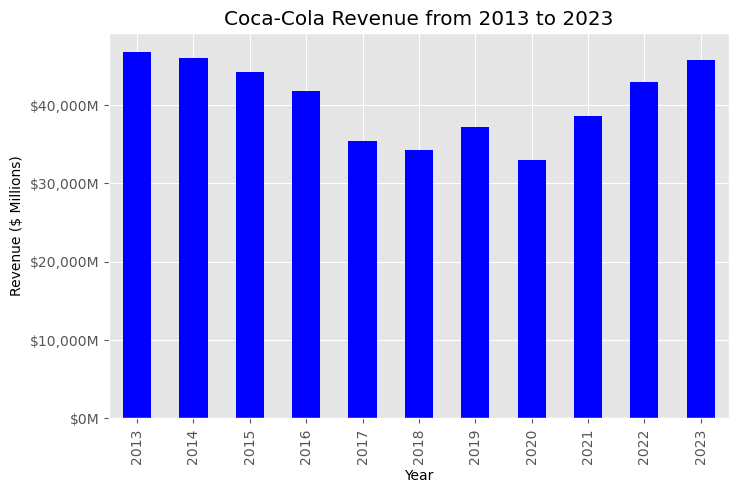

In [30]:
# Revenue Trend
df['revenues'].plot(kind='bar', figsize=(8,5), color='blue')

# Formatting x-axis labels
plt.gca().set_xticklabels([pd.to_datetime(x).strftime('%Y') for x in df.index])

# Formatting y-axis labels to display in millions with '$' prefix
plt.gca().yaxis.set_major_formatter('${:,.0f}M'.format)

# Adding title and labels
plt.title('Coca-Cola Revenue from 2013 to 2023')
plt.xlabel('Year')
plt.ylabel('Revenue ($ Millions)')

plt.show() 

Insight: Revenue trends show fluctuations, with a noticeable drop in 2020 likely due to the COVID-19 pandemic. From 2021 to 2023, Coca-Cola demonstrated a steady recovery, indicating strong sales performance and effective market adaptation. These trends highlight the company's ability to manage market conditions, which directly impacts its profitability and shareholder returns. Declines in certain years, such as 2017, may reflect strategic changes or market dynamics.

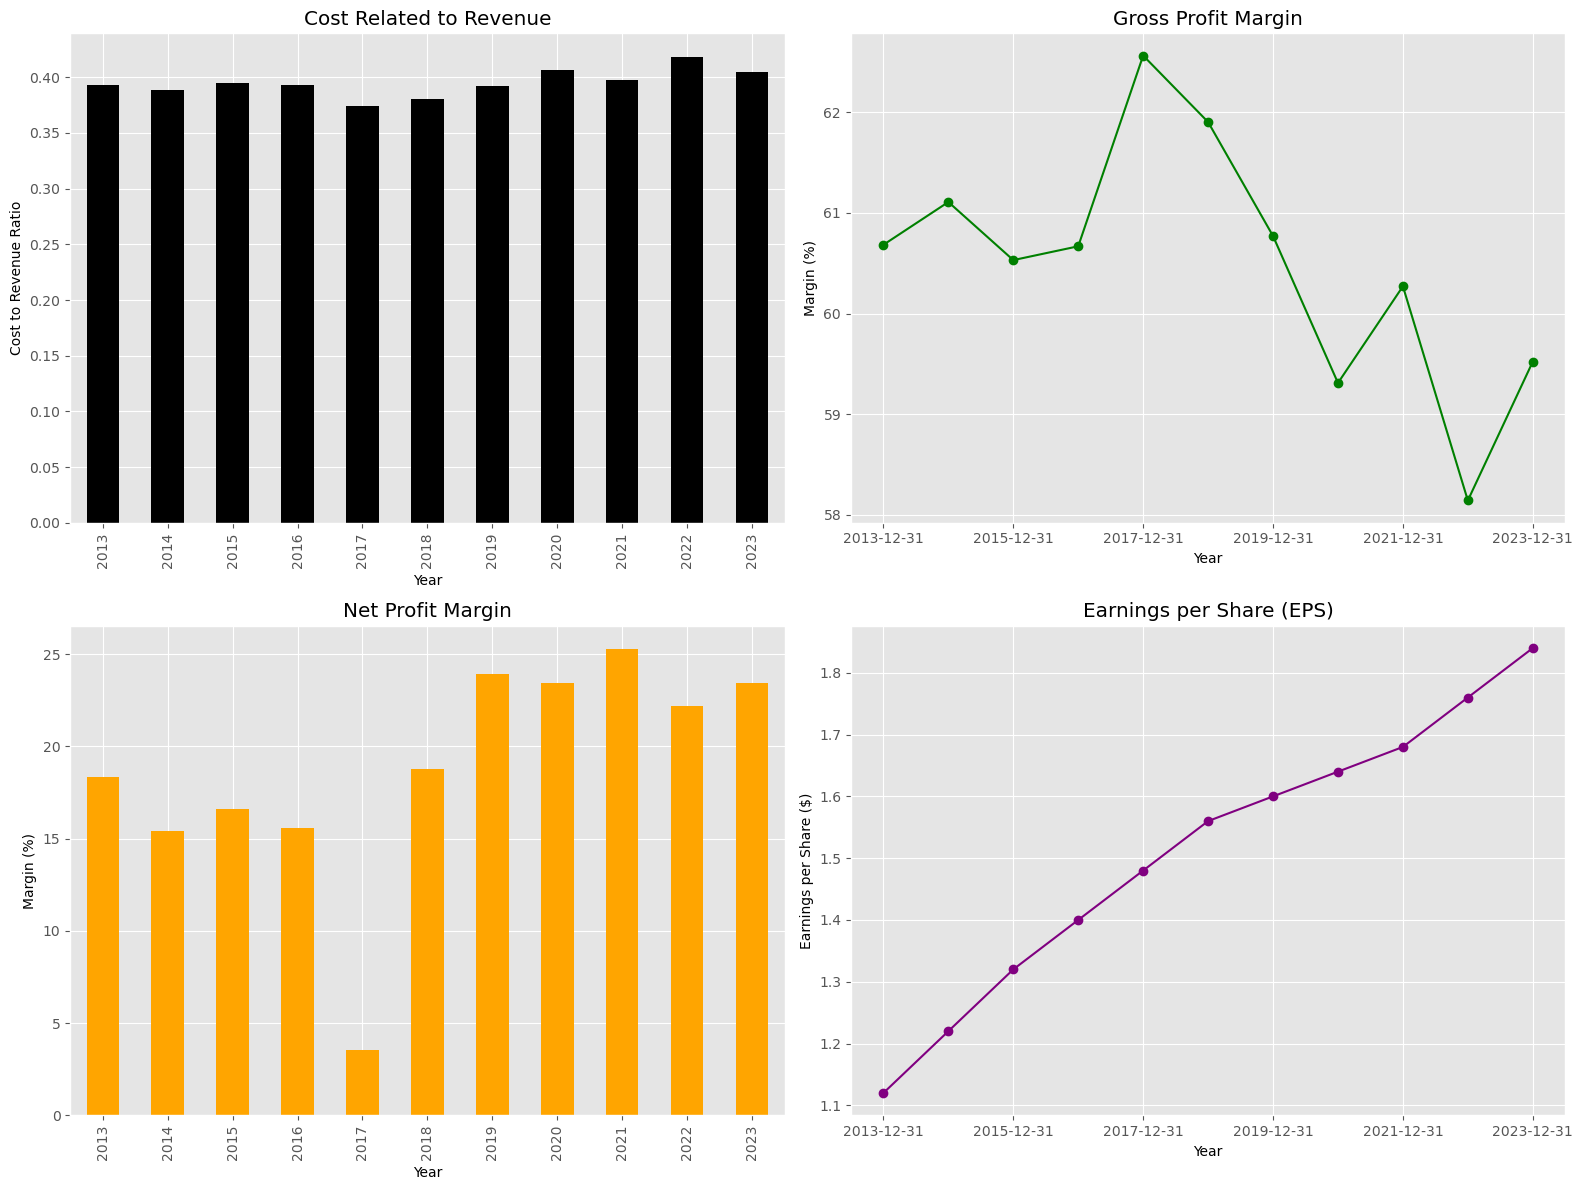

In [31]:
# Calculate additional metrics
df['cost related to revenue'] = df['cost of goods sold'] / df['revenues']
df['gross profit margin'] = (df['gross profit'] / df['revenues']) * 100
df['net profit margin'] = (df['net income attributable to shareowners of the coca-cola company'] / df['revenues']) * 100

# Plotting the metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot 1: Cost Related to Revenue
df['cost related to revenue'].plot(kind='bar', ax=axes[0, 0], color='black')
axes[0, 0].set_title('Cost Related to Revenue')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Cost to Revenue Ratio')
axes[0, 0].grid(True)
axes[0,0].set_xticklabels([pd.to_datetime(x).strftime('%Y') for x in df.index])  # Format x-axis labels to show just the year


# Plot 2: Gross Profit Margin
df['gross profit margin'].plot(kind='line', ax=axes[0, 1], marker='o', color='green')
axes[0, 1].set_title('Gross Profit Margin')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Margin (%)')
axes[0, 1].grid(True)

# Plot 3: Net Profit Margin
df['net profit margin'].plot(kind='bar', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Net Profit Margin')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Margin (%)')
axes[1, 0].grid(True)
axes[1,0].set_xticklabels([pd.to_datetime(x).strftime('%Y') for x in df.index])  # Format x-axis labels to show date

# Plot 4: Earnings per Share (EPS)
df['earnings per share (EPS)'].plot(kind='line', ax=axes[1, 1], marker='o', color='purple')
axes[1, 1].set_title('Earnings per Share (EPS)')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Earnings per Share ($)')
axes[1, 1].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Interpretation of Results
* Cost of Revenue Ratio: The Cost of Revenue Ratio indicates that around 38% to 40% of revenues are consumed by the cost of goods sold. In 2013, the ratio was 39.3%, which is quite consistent in the following years.

* Gross Profit Margin: A higher GP Margin indicates a company is more efficient at generating profit from its cost of goods sold. Coca-Cola's GP Margin remains relatively stable, hovering around 60-65% though shows some variation.  In 2013, it was 60.7%, and it fluctuates around this value in the following years.  This suggests a consistent ability to manage production costs. A  slight dip or rise can be due to changes in production efficiency

* Net Profit Margin: Coca-Cola's Net Profit Margin has some fluctuations, generally ranging from 15% to 25%. It dropped significantly in 2017 to 3.52%, indicating a challenging year, possibly due to higher expenses or lower revenues. Recovery in later years shows better cost management and profitability.

* Earnings per Share (EPS): Coca-Cola's EPS follows a similar pattern to Net Profit Margin, reflecting the company's profitability translated to per-share value.
